# Pruebas simulación TEMPEST HDMI

## Importar librerías y funciones

In [3]:
import numpy as np
from matplotlib import pyplot as plt
from skimage.io import imread
from scipy import signal
import time
from PIL import Image
from DTutils import TMDS_encoding, TMDS_serial

## Código de simulación

### Levantar imagen de prueba

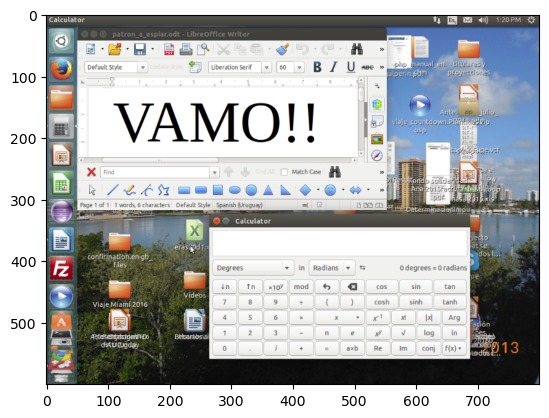

In [4]:
I=imread('../images/VAMO!!.png')
plt.figure()
plt.imshow(I)
plt.show()

### Codificar imagen y serializar los bits de forma tipo "raster"

In [5]:
# Codificación TMDS
I_TMDS = TMDS_encoding (I, blanking = True)
# Serialización y efecto de superposición de canales RGB
I_TMDS_Tx = TMDS_serial(I_TMDS)

In [69]:
# Resolución (con blanking)
v_total, h_total = I_TMDS.shape[:2]

fps = 60
px_rate = h_total*v_total*fps
bit_rate = 10*px_rate
# Tiempo continuo de transmisión de bits
t_continuous = np.arange(len(I_TMDS_Tx))/bit_rate

# Armónico elegido para centrar el espectro
N_harm = 4
harm = N_harm*px_rate

baseband_exponential = np.exp(-2j*np.pi*harm*t_continuous)

In [91]:
# Tasa de muestreo del SDR
usrp_rate = 50e6

samp_error_norm = 0.5916 # Este número sincroniza el VAMO pero esta mezclado

# Muestreo de señal analógica
I_Rx = signal.resample_poly(I_TMDS_Tx*baseband_exponential,up=int(usrp_rate*(1+samp_error_norm)), down=bit_rate)

In [92]:
I_reconstruct = np.abs(I_Rx[:(len(I_Rx)//h_total)*h_total]).reshape((len(I_Rx)//h_total,h_total))

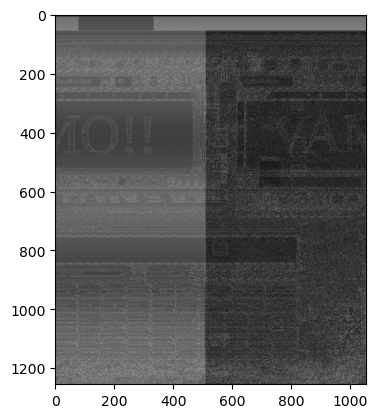

In [93]:
plt.figure()
plt.imshow(I_reconstruct, cmap='gray')
plt.show()